## Homework 7

NaiveElasticNet


In [10]:
# %% load Libraries
import pandas as pd
import numpy as np
# visualization

import matplotlib.pyplot as plt

#models
from modules.LassoRegressionClass import *
from modules.NaiveElasticRegressionClass import *
from modules.ElasticNetRegressionClass import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
#pipelines and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 




In [11]:
## Testing Class LassoRegression with the dataset cancer of prostata

# %% Load Data
df_prosate = pd.read_csv('homeworks/data/prostate.csv')



In [12]:
print(df_prosate.columns)

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')


In [13]:
#% Select data for the model
X = df_prosate.iloc[:, :-1]
y = df_prosate.iloc[:, -1]

# %% Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
X_train.shape, X_test.shape

((67, 8), (30, 8))

In [15]:
# %% Setting the parameters for testing 

# weights of the penalities l1, l2

lambda_l1_penality = 0.1

lambda_l2_penality = 0.5  

# parameters to the optimization

max_iterations=10000

threshold=1e-7


In [16]:
# Training the Model with Lasso Regression
lasso_reg = LassoRegression(lambda_l1_penality,max_iterations=max_iterations,threshold=threshold)

# definition of pipeline
my_pipeline_lasso = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lasso_reg', lasso_reg),
])

# fitting the model lasso

my_pipeline_lasso.fit(X_train, y_train)
print('Lasso Coefficients :',my_pipeline_lasso.named_steps['lasso_reg'].coef_)



Lasso Coefficients : [0.60374711 0.16410639 0.         0.         0.21582982 0.
 0.         0.        ]


In [17]:
## Training Lasso from Scikit
lasso_scikit_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=lambda_l1_penality, random_state=0))
])

lasso_scikit_pipeline.fit(X_train, y_train)
lasso_coef = lasso_scikit_pipeline.named_steps['lasso'].coef_
print('Coefficients Lasso by Scikit:',lasso_coef)

Coefficients Lasso by Scikit: [ 0.60380203  0.16409355 -0.          0.          0.21578742  0.
  0.          0.        ]


In [18]:
#%% Metric MSE  in the  model Lasso and Lasso with Scikit

y_predict_my_lasso = lasso_reg.predict(X_test)

print("MSE (Lasso Implementation):",mean_squared_error(y_predict_my_lasso,y_test))

y_predict_scikit = lasso_scikit_pipeline.predict(X_test)

print("MSE (Lasso Scikit):",mean_squared_error(y_predict_scikit,y_test))

MSE (Lasso Implementation): 1.6679614430938376
MSE (Lasso Scikit): 0.4615852651915404


In [19]:
## Similarity between vector of solutions

cosine_similarity = np.dot(my_pipeline_lasso.named_steps['lasso_reg'].coef_, lasso_coef) / (np.linalg.norm(my_pipeline_lasso.named_steps['lasso_reg'].coef_) * np.linalg.norm(lasso_coef))

print("Similitud of solutions:",cosine_similarity)

Similitud of solutions: 0.9999999955665094


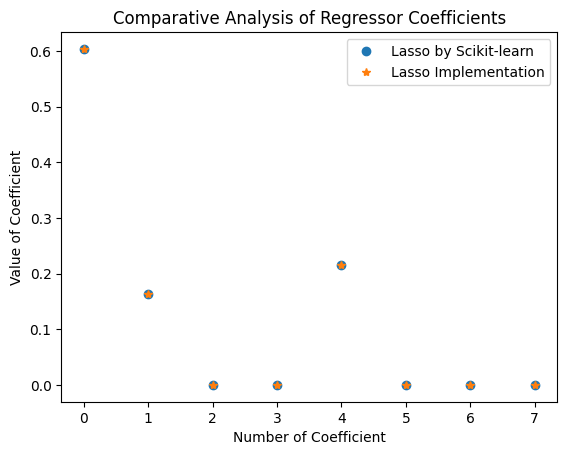

In [20]:
## Visualization of Coefficients Lasso Scikit vs Lasso Implementation

plt.plot(lasso_coef, 'o', label='Lasso by Scikit-learn')
plt.plot(my_pipeline_lasso.named_steps['lasso_reg'].coef_, '*', label='Lasso Implementation')
plt.title("Comparative Analysis of Regressor Coefficients")
plt.xlabel('Number of Coefficient')
plt.ylabel('Value of Coefficient')
plt.legend()
plt.savefig('test_lasso_regression.png')
plt.show()

In [21]:
## Testing Implementation Naive Elastics Regression
naive_elastic_reg = NaiveElasticRegression(lambda_l1_penality,lambda_l2_penality,max_iterations=max_iterations,threshold=threshold)

# Make a pipeline

my_naive_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('naive_elasticnet', naive_elastic_reg),
])

# fitting the model
my_naive_pipeline.fit(X_train, y_train)
print('Coeficientes with Naive:',my_naive_pipeline.named_steps['naive_elasticnet'].coef_)

Coeficientes with Naive: [0.59385954 0.15531498 0.         0.         0.20922166 0.
 0.         0.        ]


In [22]:
## Testing ElasticNetRegression

model_elasticnet = ElasticNetRegression(lambda_l1_penality,lambda_l2_penality,max_iterations=max_iterations, threshold=threshold)

my_elasticnet_pipeline = Pipeline(
    [
        ('std_scaled',StandardScaler()),
        ('model_elasticnet',model_elasticnet)   
    ])

my_elasticnet_pipeline.fit(X_train,y_train)
print('Coefficients elasticnet',my_elasticnet_pipeline.named_steps['model_elasticnet'].coef_)

Coefficients elasticnet [0.89078931 0.23297247 0.         0.         0.31383249 0.
 0.         0.        ]


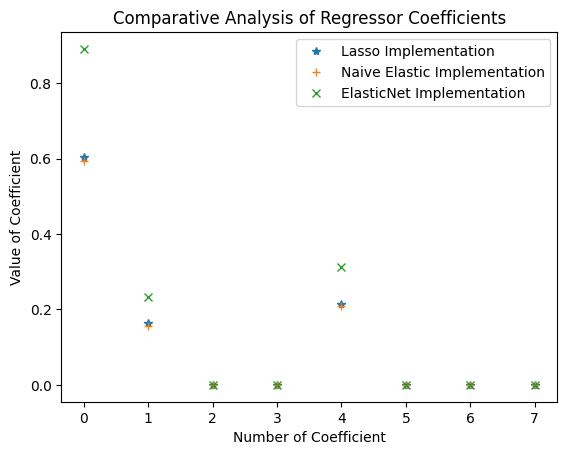

In [23]:
## Visualization of the coeficients

plt.plot(my_pipeline_lasso.named_steps['lasso_reg'].coef_, '*', label='Lasso Implementation')
plt.plot(my_naive_pipeline.named_steps['naive_elasticnet'].coef_, '+', label='Naive Elastic Implementation')
plt.plot(my_elasticnet_pipeline.named_steps['model_elasticnet'].coef_,'x',label='ElasticNet Implementation')
plt.xlabel('Number of Coefficient')
plt.ylabel('Value of Coefficient')
plt.title("Comparative Analysis of Regressor Coefficients")
plt.legend()
plt.savefig('comparative_coefficients_regression.png')
plt.show()




## Cross Validation and Tunning Hyperparameters

The cross validation is the method for tunning the parameters $\lambda_1, \lambda_2$, using ($\lambda_2,s$).

In [24]:
# %% Libraries for cross validation

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [25]:


# Define el espacio de búsqueda para los hiperparámetros
param_grid = {
    'naive_elasticnet__lambda_l1_penalty': [0.01,0.1,1,1,10,100],
    'naive_elasticnet__lambda_l2_penalty': [0.01,0.1,1,1,10,100]
}




# Grid Search
grid_search = GridSearchCV(my_naive_pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')

# fitting the model
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print('Best parameters:', grid_search.best_params_)


Best parameters: {'naive_elasticnet__lambda_l1_penalty': 0.01, 'naive_elasticnet__lambda_l2_penalty': 0.01}


In [26]:
## Setting the best parameters

lambda_l1_penality = grid_search.best_params_['naive_elasticnet__lambda_l1_penalty']
lambda_l2_penality = grid_search.best_params_['naive_elasticnet__lambda_l2_penalty']

In [27]:
#lambda_l1_penality=0.26
#lambda_l2_penality=1

In [28]:
## Experiments with the prostate dataset

# 1. Fitting OLS, Lasso,Ridge Naive Elastic Net and Elastic Net with the prostate dataset

# 1.1 Fitting OLS
steps_ols = [
    ('scaler', StandardScaler()),  # Normaliza los datos como primer paso
    ('linear_reg', LinearRegression())  # Aplica la regresión lineal como segundo paso
]

OLS_pipeline = Pipeline(steps_ols)

OLS_pipeline.fit(X_train, y_train)

OLS_predict = OLS_pipeline.predict(X_test)

print('MSE OLS:',mean_squared_error(OLS_predict,y_test))

print('Coeficientes OLS:',OLS_pipeline.named_steps['linear_reg'].coef_)


# 1.2 Fitting Lasso

steps_lasso = [
    ('scaler', StandardScaler()),  # Normaliza los datos como primer paso
    ('lasso_reg', Lasso(alpha=lambda_l1_penality))  # Aplica la regresión Lasso con el parámetro alpha aleatorio
]

# Define el pipeline
lasso_pipeline = Pipeline(steps_lasso)

lasso_pipeline.fit(X_train, y_train)

lasso_predict = lasso_pipeline.predict(X_test)

print('MSE Lasso:',mean_squared_error(lasso_predict,y_test))
print('Coeficientes Lasso:',lasso_pipeline.named_steps['lasso_reg'].coef_)


# 1.3 Fitting Ridge

steps_ridge = [
    ('scaler', StandardScaler()),  # Normaliza los datos como primer paso
    ('ridge_reg', Ridge(alpha=lambda_l2_penality))  # Aplica la regresión Ridge como segundo paso
]

ridge_pipeline = Pipeline(steps_ridge)

ridge_pipeline.fit(X_train, y_train)

ridge_predict = ridge_pipeline.predict(X_test)

print('MSE Ridge:',mean_squared_error(ridge_predict,y_test))
print('Coeficientes Ridge:',ridge_pipeline.named_steps['ridge_reg'].coef_)



MSE OLS: 0.4612959616137578
Coeficientes OLS: [ 0.73203924  0.21782892 -0.1884997   0.11806811  0.37116058 -0.24577571
  0.05190563  0.12093516]
MSE Lasso: 0.446967958725889
Coeficientes Lasso: [ 0.71002081  0.21029251 -0.15733488  0.10703442  0.34466164 -0.18534881
  0.03391059  0.09841908]
MSE Ridge: 0.4611971168381308
Coeficientes Ridge: [ 0.73182904  0.21783536 -0.18840849  0.11803424  0.37105483 -0.2455021
  0.05189813  0.12085506]


In [29]:
lambda_l1_penality = 0.1
lambda_l2_penality = 0.5

In [30]:
# 1.4 Fitting Naive Elastic Net


naive_elastic_reg = NaiveElasticRegression(lambda_l1_penality,lambda_l2_penality,max_iterations=max_iterations,threshold=threshold)
## Testing Implementation Naive Elastics Regression
# Make a pipeline

my_naive_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('naive_elasticnet', naive_elastic_reg),
])

# fitting the model
my_naive_pipeline.fit(X_train, y_train)

scaler = StandardScaler()

# Ajusta y transforma los datos de entrenamiento
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))

# Transforma los datos de prueba
y_test_scaled = scaler.transform(y_test.values.reshape(-1,1))

y_predict_naive = my_naive_pipeline.predict(X_test)

print('MSE Naive Elastic:',mean_squared_error(y_predict_naive,y_test_scaled))
print('Coeficientes with Naive:',my_naive_pipeline.named_steps['naive_elasticnet'].coef_)


# 1.5 Fitting Elastic Net

model_elasticnet = ElasticNetRegression(lambda_l1_penality,lambda_l2_penality,max_iterations=max_iterations, threshold=threshold)

my_elasticnet_pipeline = Pipeline(
    [
        ('std_scaled',StandardScaler()),
        ('model_elasticnet',model_elasticnet)   
    ])

my_elasticnet_pipeline.fit(X_train,y_train)

y_predict_elasticnet = my_elasticnet_pipeline.predict(X_test)
print('MSE ElasticNet:',mean_squared_error(y_predict_elasticnet,y_test_scaled))
print('Coefficients elasticnet',my_elasticnet_pipeline.named_steps['model_elasticnet'].coef_)

MSE Naive Elastic: 0.3429351969614338
Coeficientes with Naive: [0.59385954 0.15531498 0.         0.         0.20922166 0.
 0.         0.        ]
MSE ElasticNet: 0.573892784542383
Coefficients elasticnet [0.89078931 0.23297247 0.         0.         0.31383249 0.
 0.         0.        ]


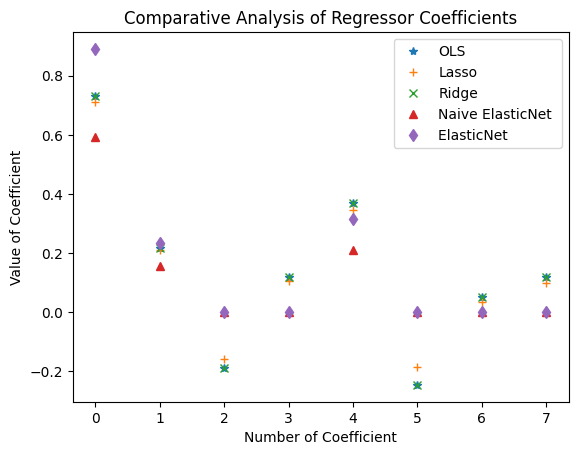

In [32]:
## Visualization of Coefficients



plt.plot(OLS_pipeline.named_steps['linear_reg'].coef_, '*', label='OLS')
plt.plot(lasso_pipeline.named_steps['lasso_reg'].coef_, '+', label='Lasso')
plt.plot(ridge_pipeline.named_steps['ridge_reg'].coef_, 'x', label='Ridge')
plt.plot(my_naive_pipeline.named_steps['naive_elasticnet'].coef_,'^',label='Naive ElasticNet ')

plt.plot(my_elasticnet_pipeline.named_steps['model_elasticnet'].coef_,'d',label='ElasticNet ')

plt.title("Comparative Analysis of Regressor Coefficients")
plt.xlabel('Number of Coefficient')
plt.ylabel('Value of Coefficient')

plt.legend()
plt.savefig('all_models_regression.png')
plt.show()

In [ ]:
## 